In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
x_train /= 255
x_test /= 255

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [9]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

In [10]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.6387 - accuracy: 0.8318 - val_loss: 0.3322 - val_accuracy: 0.9068
Epoch 2/10
60000/60000 [==============================] - 48s 800us/step - loss: 0.3071 - accuracy: 0.9121 - val_loss: 0.2606 - val_accuracy: 0.9247
Epoch 3/10
60000/60000 [==============================] - 49s 811us/step - loss: 0.2535 - accuracy: 0.9265 - val_loss: 0.2227 - val_accuracy: 0.9355
Epoch 4/10
60000/60000 [==============================] - 48s 799us/step - loss: 0.2205 - accuracy: 0.9362 - val_loss: 0.1977 - val_accuracy: 0.9416
Epoch 5/10
60000/60000 [==============================] - 48s 801us/step - loss: 0.1964 - accuracy: 0.9430 - val_loss: 0.1800 - val_accuracy: 0.9471
Epoch 6/10
60000/60000 [==============================] - 48s 800us/step - loss: 0.1775 - accuracy: 0.9488 - val_loss: 0.1653 - val_accuracy: 0.9529
Epoch 7/10
60000/60000 [==============================] 

In [12]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 2s 209us/step
Test loss 0.1216, accuracy 96.49%


Text(0, 0.5, 'accuracy')

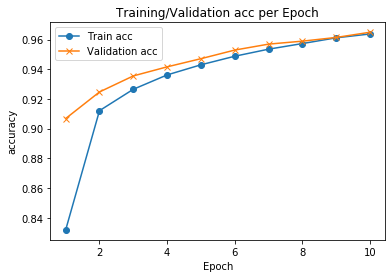

In [16]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

Text(0, 0.5, 'Loss')

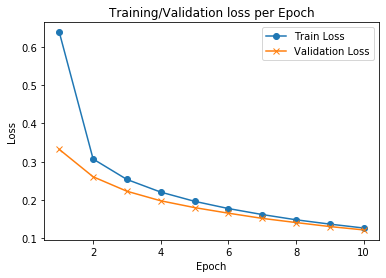

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')